# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**The business question** identify key drivers for used car prices

**I need to develop** a predictive model to estimate the price of a used car based on relevant features (such as make, model, age, mileage, condition, etc.). 

**The goal is** to apply supervised learning techniques to uncover significant patterns and relationships between the input variables (features) and the target variable (car price), ultimately determining which features have the greatest impact on price prediction. 

**This task will involve** data understanding, data preparation, modeling, evaluation, developing.

##############################################################################################################################

##############################################################################################################################

##############################################################################################################################

# Data Understanding

**Understand the structure** 
Check how the data is organized
Find out numeric and categorical, dates for each column.
Ensure that the data types align with expectations (e.g., mileage should be numeric).

**Identify missing values** (nulls, NaNs) and their proportions in each column.

**Review and summarize numerical variables** find out some statistics and look for example for minimum variable and if those are possible values.

**Review and summarize categorical variables** 
Check for consistency and spelling errors, and evaluate how the categories are distributed - Count unique values and plot frequency distributions.
Check for correlation between categorical variables, using Cramér’s V.

**Check for Duplicates**:
Look for duplicate rows or records that might distort the analysis - Ensure the dataset is clean and doesn't contain redundant information.

**Investigate any unexpected values** Detect and flag potential errors or anomalies in the data that may need correction or removal.



In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations (if needed for calculations)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import chi2_contingency

In [2]:
file_path = os.path.join('data', 'vehicles.csv')
df = pd.read_csv(file_path)

### Understand the structure 

In [3]:
# Understand the structure
dataset_shape = df.shape  # Returns a tuple (number of rows, number of columns)
columns_info = df.columns  # Returns a list of column names
print(f"Dataset Shape (Rows, Columns): {dataset_shape}")

print(f"Column Names: {columns_info}")

##################

# Examine the data types
data_types = df.dtypes
print("Data Types for Each Column:")

print(data_types)

##################


Dataset Shape (Rows, Columns): (426880, 18)
Column Names: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
Data Types for Each Column:
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


### Identify missing values

In [4]:
missing_data_counts = df.isnull().sum()
missing_data_percentage = (missing_data_counts / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_counts,
    'Percentage Missing (%)': missing_data_percentage
})

print("Missing Data Summary:")
print(missing_data_summary.sort_values(by='Percentage Missing (%)', ascending=False))

Missing Data Summary:
              Missing Values  Percentage Missing (%)
size                  306361               71.767476
cylinders             177678               41.622470
condition             174104               40.785232
VIN                   161042               37.725356
drive                 130567               30.586347
paint_color           130203               30.501078
type                   92858               21.752717
manufacturer           17646                4.133714
title_status            8242                1.930753
model                   5277                1.236179
odometer                4400                1.030735
fuel                    3013                0.705819
transmission            2556                0.598763
year                    1205                0.282281
id                         0                0.000000
region                     0                0.000000
price                      0                0.000000
state                   

### Review and summarize Numerical variables

In [5]:
# Select only numeric columns for summary statistics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate summary statistics for numeric columns
summary_stats = df[numeric_cols].describe()

# Add median to the summary (since describe() doesn't calculate it)
median_stats = df[numeric_cols].median()

# Display summary statistics
print("Summary Statistics (mean, min, max, std):")
print(summary_stats)

print("\nMedian Statistics:")
print(median_stats)

Summary Statistics (mean, min, max, std):
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

Median Statistics:
id          7.312621e+09
price       1.395000e+04
year        2.013000e+03
odometer    8.554800e+04
dtype: float64


### Review and summarize categorical variables 

In [6]:
##################

# Review and summarize categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns  # Find all categorical columns


categorical_summary = {}
for col in categorical_columns:# Count unique values and display a sample of unique values
    categorical_summary[col] = {
        "unique_values": df[col].nunique(),
        "sample_unique_values": df[col].unique()[:5]  # Show only the first 5 unique values
    }

for col, summary in categorical_summary.items():
    print(f"\nColumn: {col}")
    print(f"Unique Values Count: {summary['unique_values']}")
    print(f"Sample Unique Values: {summary['sample_unique_values']}")




Column: region
Unique Values Count: 404
Sample Unique Values: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro']

Column: manufacturer
Unique Values Count: 42
Sample Unique Values: [nan 'gmc' 'chevrolet' 'toyota' 'ford']

Column: model
Unique Values Count: 29649
Sample Unique Values: [nan 'sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew'
 'tundra double cab sr']

Column: condition
Unique Values Count: 6
Sample Unique Values: [nan 'good' 'excellent' 'fair' 'like new']

Column: cylinders
Unique Values Count: 8
Sample Unique Values: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders']

Column: fuel
Unique Values Count: 5
Sample Unique Values: [nan 'gas' 'other' 'diesel' 'hybrid']

Column: title_status
Unique Values Count: 6
Sample Unique Values: [nan 'clean' 'rebuilt' 'lien' 'salvage']

Column: transmission
Unique Values Count: 3
Sample Unique Values: [nan 'other' 'automatic' 'manual']

Column: VIN
Unique Values Count: 118246
Sample

### Find correlation between categorical variable using Cramér's V

In [7]:
# Function to apply Cramér's V

def cramers_v(contingency_table):
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# Columns list of selected cat variables

categorical_cols = [
    'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
    'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'
]

# Empty matrix to mem results for Cramér's V
n = len(categorical_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan  # set nan on principal diagona and not 1, to not disturb next selection "strong"

# Visualizzare la matrice di Cramér's V
#print("Matrice di Cramér's V:")
#print(cramers_v_matrix)

# Filter couples with Cramér's V > 0.5
strong_relationships = cramers_v_matrix[(cramers_v_matrix > 0.5) & (cramers_v_matrix != np.nan)]
#print("Relazioni forti (> 0.5):")
#print(strong_relationships)

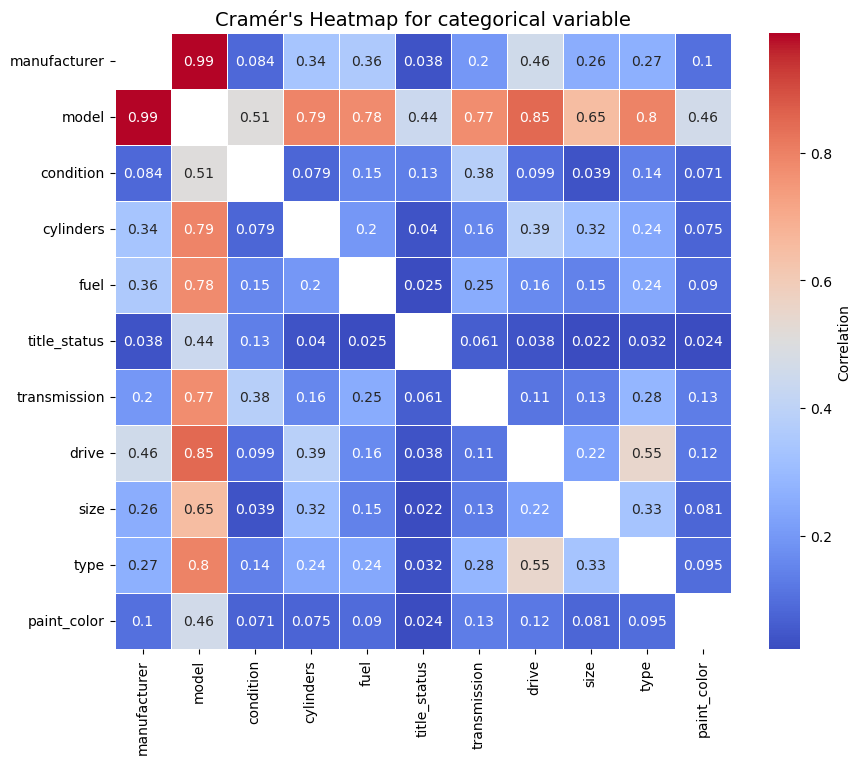

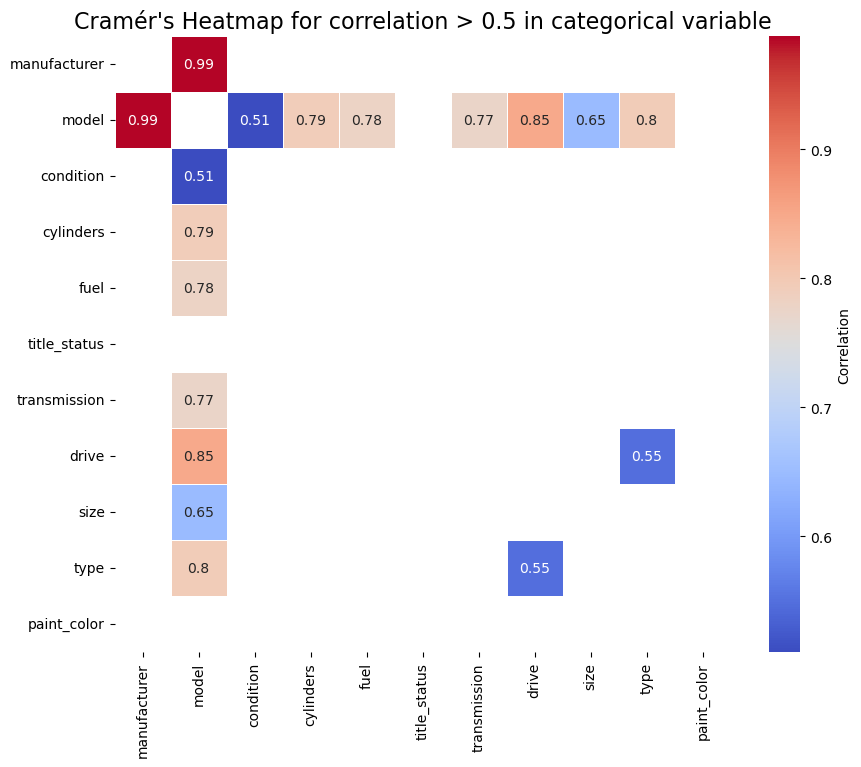

In [8]:
# Printing the heat map for all cat variable
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'}, linewidths=0.5, square=True)
plt.title("Cramér's Heatmap for categorical variable", fontsize=14)
plt.savefig('images/Categorical_Variab__corr_All.jpg')
plt.show()


# Printing the heat map for strong correlation > 0.5
plt.figure(figsize=(10, 8))
sns.heatmap(strong_relationships, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'}, linewidths=0.5, square=True)
plt.title("Cramér's Heatmap for correlation > 0.5 in categorical variable", fontsize=16)
plt.savefig('images/Categorical_Variab_strong_corr.jpg')
plt.show()


### Correlation Matrix for numerical variable

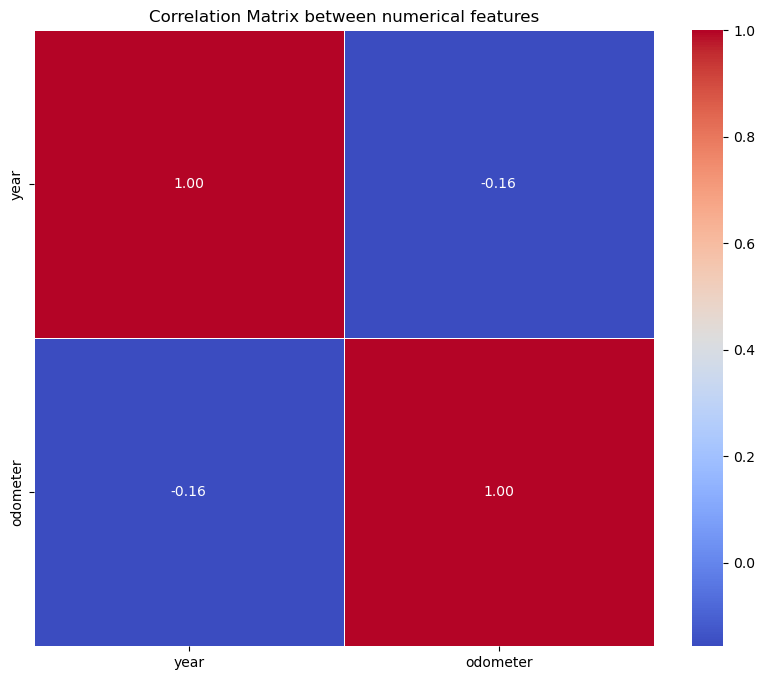

In [9]:
# Selezionare solo le variabili numeriche
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_corr = numerical_cols.drop(['id','price'])

# Calcolare la matrice di correlazione
correlation_matrix = df[numerical_cols_corr].corr(method='pearson')  # O method='spearman' per correlazione di Spearman

# Visualizzare la matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between numerical features')
plt.savefig('images/numerical_Variab_corr.jpg')
plt.show()

### Check for Duplicates

In [10]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


### Investigate any unexpected values

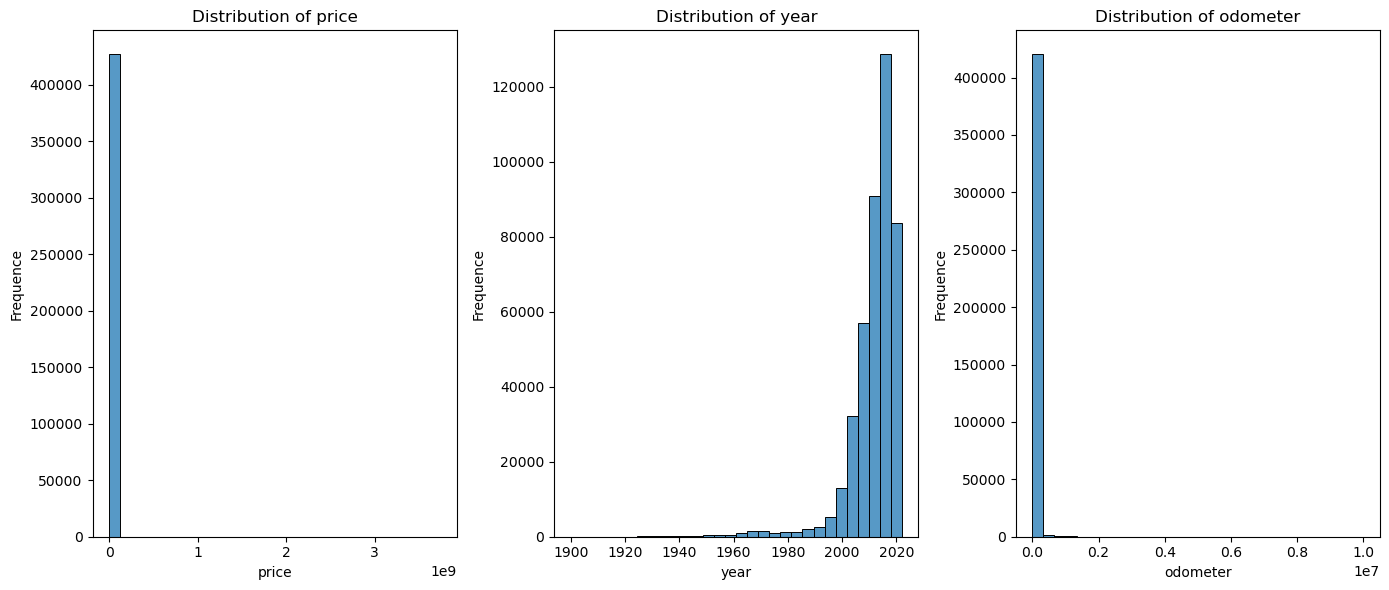

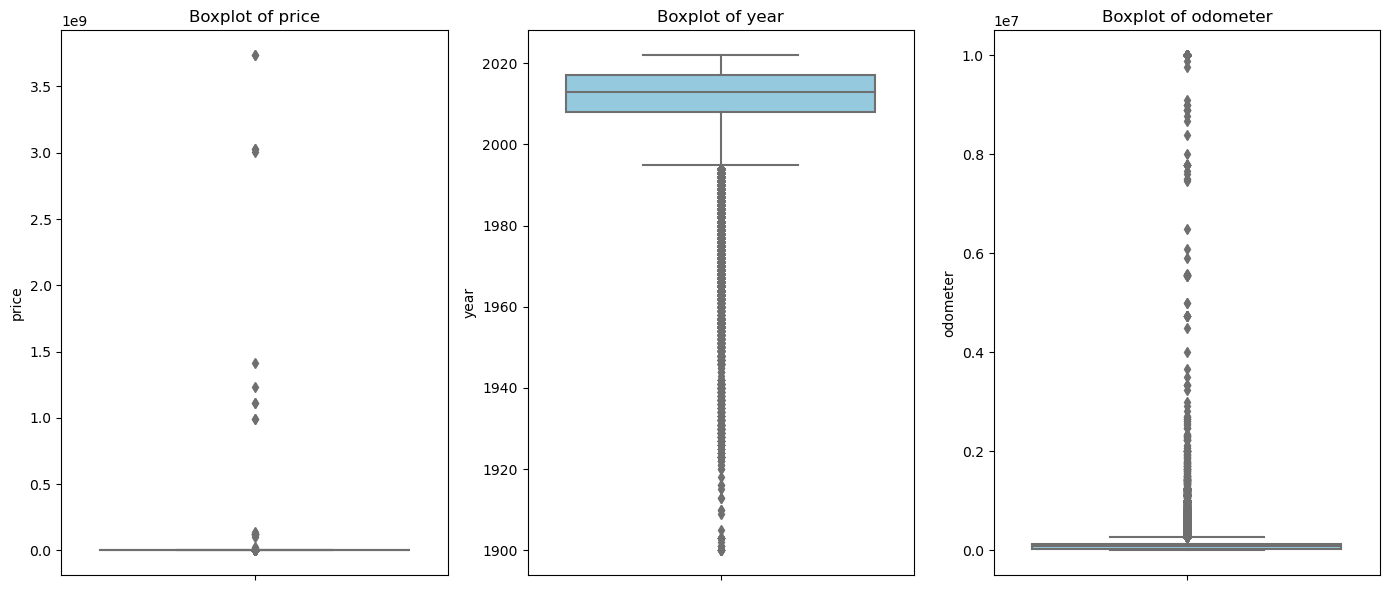

In [11]:
# Selecting only the numeric columns from the DataFrame
numeric_col_box = numerical_cols.drop(['id'])

# Determine the number of numeric columns
num_cols = len(numeric_col_box)

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(14, 6))
axes = axes.flatten()

# Plot each numeric column in a subplot
for i, col in enumerate(numeric_col_box):
    sns.histplot(df[col], bins=30, kde=False, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequence')

# Remove any empty subplots if the number of numeric columns is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/numerical_Variab_distribution.jpg')
plt.show()



# Create a 1x3 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(14, 6))
axes = axes.flatten()

# Plot each numeric column in a subplot using boxplots
for i, col in enumerate(numeric_col_box):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove any empty subplots if the number of numeric columns is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/numerical_Variab_BoxPlot.jpg')
plt.show()


##############################################################################################################################

##############################################################################################################################

##############################################################################################################################

# Data Preparation


### Complete Null data from model

In [12]:
# Funzione per imputare i valori mancanti con la moda per ogni gruppo di 'model'
def fill_missing_with_mode(df, column, group_col='model'):
    df[column] = df.groupby(group_col)[column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
    return df

# Colonne con informazioni mancanti che sono correlate a 'model'
columns_to_impute = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

# Iterare sulle colonne per riempire i valori mancanti usando la moda di 'model'
for col in columns_to_impute:
    df = fill_missing_with_mode(df, col)

# Controllare se sono rimasti valori mancanti
print(df[columns_to_impute].isnull().sum())

condition       28265
cylinders       43236
fuel             6795
transmission     5456
drive           28910
size            92288
type            15496
dtype: int64


### Drop column VIN and State
**VIN** not utils for our analysis (vehicle identification)

**paint_color** considered not too important for our analysis and with too much missing data that cannot be filled.
### Drop Model and paint color 
**state** was dropped: take the information as region

**model** was dropped: take the information as in 1) -- so we need to eliminate relation in features.

In [13]:
# Creare una copia di df
df_copy = df.copy()

# Sostituire "" e " " con None solo quando l'intera cella è vuota o contiene solo uno spazio
df_copy.replace({"": None, " ": None, "other":None}, inplace=True)

# Eliminare le colonne 'model', 'VIN', e 'state'
df_copy = df_copy.drop(columns=['model', 'VIN', 'state', 'paint_color'])

# Eliminare le righe con valori nulli
df_copy_cleaned = df_copy.dropna()

# Visualizzare il numero di righe e colonne rimanenti dopo l'eliminazione dei null
original_shape = df.shape
cleaned_shape = df_copy_cleaned.shape

print(f"Shape of original dataset: {original_shape}")
print(f"Shape of cleaned dataset: {cleaned_shape}")

# Calcolare la percentuale di dati rimanenti
rows_remaining = cleaned_shape[0]
rows_original = original_shape[0]
percentage_remaining = (rows_remaining / rows_original) * 100

print(f"Percentage of residuals: {percentage_remaining:.2f}%")

# Visualizzare il numero di valori mancanti per colonna nel dataset pulito
print("Number of Null Values in cleaned dataset:")
print(df_copy_cleaned.isnull().sum())

Shape of original dataset: (426880, 18)
Shape of cleaned dataset: (281879, 14)
Percentage of residuals: 66.03%
Number of Null Values in cleaned dataset:
id              0
region          0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
dtype: int64


### Select from price and odometer just range of data:
**price > 500** --- behind are errors, in real market is not interesting or possible price less than 500

**odometer < 500000** --- more than 500000 could be not interesting in the analysis and in the real market, the engine need to be refurbished

**odometer > 50** --- behind are errors, in real market the car would not be selled as used

### Drop Pattern in data price
drop pattern as 123456789 - i found some pattern in price like 123456789 or 12345678 that are for sure errors (others features of this records were at null).

### Logtransform data for price and odometer 
### Find out ouliers and drop them

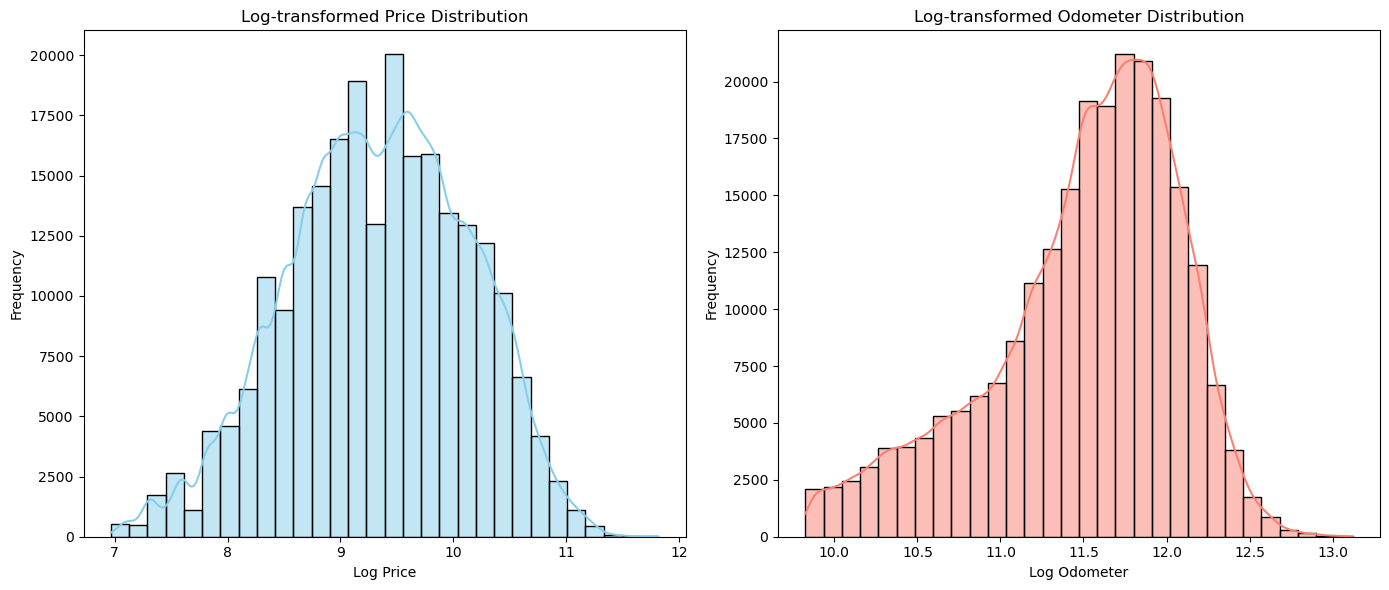

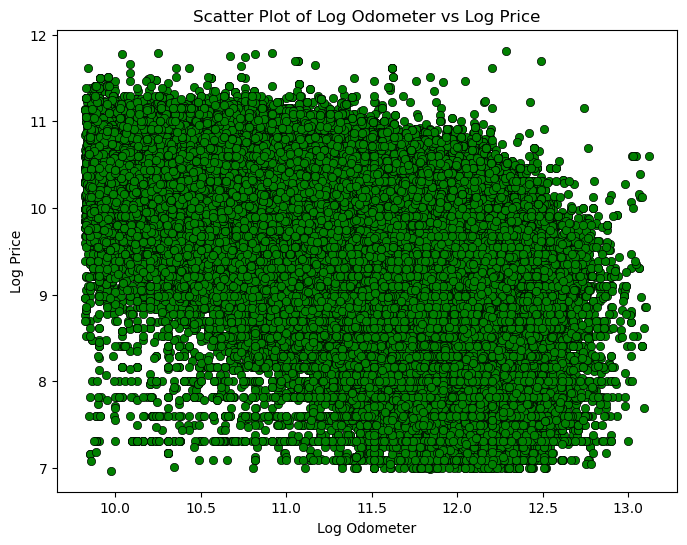

<class 'pandas.core.frame.DataFrame'>
Index: 233857 entries, 31 to 426874
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            233857 non-null  int64  
 1   region        233857 non-null  object 
 2   price         233857 non-null  int64  
 3   year          233857 non-null  float64
 4   manufacturer  233857 non-null  object 
 5   condition     233857 non-null  object 
 6   cylinders     233857 non-null  object 
 7   fuel          233857 non-null  object 
 8   odometer      233857 non-null  float64
 9   title_status  233857 non-null  object 
 10  transmission  233857 non-null  object 
 11  drive         233857 non-null  object 
 12  size          233857 non-null  object 
 13  type          233857 non-null  object 
 14  log_price     233857 non-null  float64
 15  log_odometer  233857 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 30.3+ MB
Shape Original Dataset: (426880, 18)


In [15]:
# Filter the data based on price > 500 and odometer (>50; < 500000) 
df1 = df_copy_cleaned.query("price > 500 and odometer < 500000 and odometer > 50")

# some price errors were found
pattern = r'^(0|1|12|123|1234|12345|123456|1234567|12345678|123456789|1234567890|12345678901)$'
df1 = df1[~df1['price'].astype(str).str.match(pattern)]

# Log-transform 'price' and 'odometer'
df1['log_price'] = np.log(df1['price'])
df1['log_odometer'] = np.log(df1['odometer'])

# Calculate the IQR for log-transformed price and odometer to find outliers
Q1_price = df1['log_price'].quantile(0.25)
Q3_price = df1['log_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_odometer = df1['log_odometer'].quantile(0.25)
Q3_odometer = df1['log_odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# Define outliers as values outside 1.5 * IQR
price_outliers = df1[(df1['log_price'] < (Q1_price - 1.5 * IQR_price)) | (df1['log_price'] > (Q3_price + 1.5 * IQR_price))]
odometer_outliers = df1[(df1['log_odometer'] < (Q1_odometer - 1.5 * IQR_odometer)) | (df1['log_odometer'] > (Q3_odometer + 1.5 * IQR_odometer))]

# Remove outliers from the filtered data
df2 = df1[~df1.index.isin(price_outliers.index)]
df3 = df2[~df2.index.isin(odometer_outliers.index)]

# Create a plot for log_price and log_odometer
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the log-transformed price distribution
sns.histplot(df3['log_price'], bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Log-transformed Price Distribution')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')

# Plot the log-transformed odometer distribution
sns.histplot(df3['log_odometer'], bins=30, kde=True, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Log-transformed Odometer Distribution')
axes[1].set_xlabel('Log Odometer')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('images/log_price_odometer_distribution.jpg')
plt.show()

# Create a scatter plot to visualize the relationship between log_price and log_odometer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_odometer', y='log_price', data=df3, color='green', edgecolor='black')
plt.title('Scatter Plot of Log Odometer vs Log Price')
plt.xlabel('Log Odometer')
plt.ylabel('Log Price')
plt.savefig('images/log_odometer_vs_log_price_scatter.jpg')
plt.show()

# Displaying basic information about df3
df3.info()

# Calculate N rows for original and cleaned dataset
original_shape = df.shape
cleaned_shape = df3.shape

print(f"Shape Original Dataset: {original_shape}")
print(f"Shape resulting Dataset After Cleaning: {cleaned_shape}")

# Calculate percentage of residuals data
rows_remaining = cleaned_shape[0]
rows_original = original_shape[0]
percentage_remaining = (rows_remaining / rows_original) * 100

print(f"Percentage of data residuals: {percentage_remaining:.2f}%")


### Double check
to be sure verify again statics on numerical variables

In [17]:
df4 = df3.copy()

# Dropping unnecessary columns
#df4 = df3.drop(columns=['id'])

# Select only numeric columns for summary statistics
numeric_cols = df4.select_dtypes(include=['float64', 'int64']).columns

# Generate summary statistics for numeric columns
summary_stats = df4[numeric_cols].describe()

# Display summary statistics
print("Summary Statistics (mean, min, max, std):")
print(summary_stats)

# Handling missing data
missing_data_counts = df4.isnull().sum()
missing_data_percentage = (missing_data_counts / len(df4)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_counts,
    'Percentage Missing (%)': missing_data_percentage
})

print("Missing Data Summary:")
print(missing_data_summary.sort_values(by='Percentage Missing (%)', ascending=False))

Summary Statistics (mean, min, max, std):
                 id          price           year       odometer  \
count  2.338570e+05  233857.000000  233857.000000  233857.000000   
mean   7.311660e+09   15308.523478    2010.028021  114524.592328   
std    4.287129e+06   12216.858437       8.020240   56989.410659   
min    7.301583e+09    1063.000000    1905.000000   18495.000000   
25%    7.308302e+09    6500.000000    2007.000000   72173.000000   
50%    7.312873e+09   11788.000000    2012.000000  110000.000000   
75%    7.315259e+09   20000.000000    2015.000000  150000.000000   
max    7.317101e+09  135000.000000    2022.000000  499232.000000   

           log_price   log_odometer  
count  233857.000000  233857.000000  
mean        9.335766      11.502318  
std         0.802116       0.581088  
min         6.968850       9.825256  
25%         8.779557      11.186821  
50%         9.374837      11.608236  
75%         9.903488      11.918391  
max        11.813030      13.120826  
Mis

##############################################################################################################################

##############################################################################################################################

##############################################################################################################################

# Modeling

With the cleaned dataset (df3) apply some modeling: 
- Modeling with linear regression Ridge
- Modeling with Lasso
- Modeling with ElasticNet
Based on MSE we go to select the best model

**Define indipendent variable and target value** -- from indipendent variable we go to drop target value, not logtransoformed data and id

**Define train and test**

**Define categorical and numerical features**

In [19]:
X_df_clean = df4.drop(columns=['id', 'price', 'odometer', 'log_price'])
Y_df_clean = df4['log_price']

# split data

X_train, X_test, y_train, y_test = train_test_split(X_df_clean, Y_df_clean, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X_df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_df_clean.select_dtypes(include=[np.number]).columns.tolist()

## Preprocessing
### For Categorical features:
-Using OneHotEncode to trasform features 

-drop the first category column for each transformed feature To solves the multicollinearity

-store in drop_value the ref for the baseline 
### For Numerical features:
-Using Scaler

In [20]:
# Combine training and test data
X_combined = pd.concat([X_train, X_test])

# Step 1: Replace all occurrences of 'other' with 'Zother'
X_combined = X_combined.replace('other', 'Zother')

# Step 2: Identify and print the value that will be dropped for each categorical column
drop_values = {}
for col in categorical_features:
    # Get unique sorted values in the column
    unique_values = sorted(X_combined[col].dropna().unique())
    
    # The first value in the sorted list will be dropped
    drop_value = unique_values[0]
    
    # Store the dropped value
    drop_values[col] = drop_value
    
    # Print the dropped value
    print(f"Value dropped for '{col}' will be '{drop_value}'.")

# Step 3: Create OneHotEncoder with drop='first'
# We are using drop='first' but we've already printed the first value for each column
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot_encoder)
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the combined data
preprocessor.fit(X_combined)


Value dropped for 'region' will be 'SF bay area'.
Value dropped for 'manufacturer' will be 'acura'.
Value dropped for 'condition' will be 'excellent'.
Value dropped for 'cylinders' will be '10 cylinders'.
Value dropped for 'fuel' will be 'diesel'.
Value dropped for 'title_status' will be 'clean'.
Value dropped for 'transmission' will be 'automatic'.
Value dropped for 'drive' will be '4wd'.
Value dropped for 'size' will be 'compact'.
Value dropped for 'type' will be 'SUV'.


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['year', 'log_odometer']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['region', 'manufacturer', 'condition',
                                  'cylinders', 'fuel', 'title_status',
                                  'transmission', 'drive', 'size', 'type'])])

### Modeling with linear regression Ridge
-Modeling with Ridge Model

-apply GridSearchCV with several alpha to select better

-using Mean Square Error to select better alpha, using MSE because heavily penalizes larger errors, making it useful for regression tasks where the cost of large deviations is high.

-calculate: best alpha and thus MSE, coefficients 

In [22]:
# Step 1: Use Ridge Regression as the model
model = Ridge()


# Step 2: Create the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 3: Define the parameter grid for Ridge Regression (tuning the alpha parameter)
param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1.0, 10, 100]  # Example values for Ridge regularization strength
}

# Step 4: Apply GridSearchCV
grid_search_ridge = GridSearchCV(pipeline, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')  # For regression

# Step 5: Fit the grid search to the data (assuming X_train and y_train are your data)
grid_search_ridge.fit(X_train, y_train)

# Step 6: Best parameters and score
print(f"Best parameters: {grid_search_ridge.best_params_}")
print(f"Best cross-validation MSE: {-grid_search_ridge.best_score_:.4f}")

Best parameters: {'model__alpha': 10}
Best cross-validation MSE: 0.1878


In [23]:
# Extract the best estimator from the grid search
ridge_model = grid_search_ridge.best_estimator_

# Get the feature names from the preprocessor pipeline
onehot_feature_names = ridge_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# Now extract the coefficients from the Ridge model
ridge_coefs = pd.Series(ridge_model.named_steps['model'].coef_, index=feature_names)

# Display the top 10 coefficients
print("Ridge Coefficients:")
print(ridge_coefs.sort_values(ascending=False).head(10))  # Top 10 largest coefficients in Ridge

Ridge Coefficients:
manufacturer_datsun          0.746185
manufacturer_ferrari         0.406006
manufacturer_porsche         0.372989
type_offroad                 0.285050
type_truck                   0.264011
region_susanville            0.251284
year                         0.247727
type_pickup                  0.220241
region_huntington-ashland    0.213911
region_chillicothe           0.206759
dtype: float64


### Modeling with Lasso
-Modeling with Lasso Model

-apply GridSearchCV with several alpha to select better

-using Mean Square Error to select better alpha, using MSE because heavily penalizes larger errors, making it useful for regression tasks where the cost of large deviations is high.

-calculate: best alpha and thus MSE, coefficients 

In [24]:
# Step 1: Use Lasso Regression as the model
model = Lasso()

# Step 2: Create the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined earlier as in your original code
    ('model', model)
])

# Step 3: Define the parameter grid for Lasso Regression (tuning the alpha parameter)
# due the fact that with ridge i found alpha = 1, i aspect that it can be 1 or less, so to reduce time to compute i limit alpha to 
# 0.01,0.1, 1.0
param_grid_lasso = {
    'model__alpha': [0.01, 0.1, 1.0, 10, 100],
    'model__max_iter': [1000],
    'model__tol': [1e-3]
}

# Step 4: Apply GridSearchCV
grid_search_lasso = GridSearchCV(pipeline, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')  # For regression

# Step 5: Fit the grid search to the data (assuming X_train and y_train are your data)
grid_search_lasso.fit(X_train, y_train)

# Step 6: Best parameters and score
print(f"Best parameters: {grid_search_lasso.best_params_}")
print(f"Best cross-validation MSE: {-grid_search_lasso.best_score_:.4f}")

Best parameters: {'model__alpha': 0.01, 'model__max_iter': 1000, 'model__tol': 0.001}
Best cross-validation MSE: 0.2255


In [25]:
# Extract the best estimator from the grid search for Lasso
lasso_model = grid_search_lasso.best_estimator_

# Get the feature names from the preprocessor pipeline
onehot_feature_names = lasso_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# Now extract the coefficients from the Lasso model
lasso_coefs = pd.Series(lasso_model.named_steps['model'].coef_, index=feature_names)

# Display the top 10 coefficients
print("\nLasso Coefficients:")
print(lasso_coefs.sort_values(ascending=False).head(10))  # Top 10 largest coefficients in Lasso

# Lasso may have many zero coefficients due to its feature selection ability
print(f"Number of zero coefficients in Lasso: {(lasso_coefs == 0).sum()}")



Lasso Coefficients:
year                     0.248629
cylinders_8 cylinders    0.208564
type_truck               0.176345
type_pickup              0.100363
size_full-size           0.064798
manufacturer_toyota      0.018164
region_san angelo        0.000000
region_san antonio      -0.000000
region_south dakota      0.000000
region_south coast      -0.000000
dtype: float64
Number of zero coefficients in Lasso: 468


### Modeling with ElasticNet

-Modeling with ElasticNet Model

-apply GridSearchCV with several alpha and model__l1_ratio to select better

-using Mean Square Error to select better alpha, using MSE because heavily penalizes larger errors, making it useful for regression tasks where the cost of large deviations is high.

-calculate: best alpha, best model__l1_ratio and thus MSE, coefficients 

In [26]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined earlier as in your original code
    ('model', model)
])

param_grid_elastic = {
    'model__alpha': [0.01, 0.1, 1.0, 10, 100],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

grid_search_elastic = GridSearchCV(pipeline, param_grid_elastic, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train, y_train)

print(f"Best ElasticNet parameters: {grid_search_elastic.best_params_}")
print(f"Best cross-validation MSE for ElasticNet: {-grid_search_elastic.best_score_:.4f}")


Best ElasticNet parameters: {'model__alpha': 0.01, 'model__l1_ratio': 0.1}
Best cross-validation MSE for ElasticNet: 0.2054


In [27]:
# Extract the best estimator from the grid search
ElasticNet_model = grid_search_elastic.best_estimator_

# Get the feature names from the preprocessor pipeline
onehot_feature_names = ElasticNet_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# Now extract the coefficients from the Ridge model
ElasticNet_coefs = pd.Series(ElasticNet_model.named_steps['model'].coef_, index=feature_names)

# Display the top 10 coefficients
print("ElasticNet Coefficients:")
print(ElasticNet_coefs.sort_values(ascending=False).head(10))  # Top 10 largest coefficients in Ridge

ElasticNet Coefficients:
year                     0.254951
type_truck               0.235400
cylinders_8 cylinders    0.209064
type_pickup              0.175227
manufacturer_lexus       0.140121
manufacturer_toyota      0.132593
size_full-size           0.110334
transmission_manual      0.099008
type_coupe               0.063119
type_convertible         0.060267
dtype: float64


# Evaluation Using Ridge Model

based on Result of the section Modeling go to choose Ridge Model based on minimun MSE, we go to train the model with the best alpha find out the coeffiecients and apply permutation_importance to find out which are the top ten features.

In [28]:
# Define the model with Ridge Regression
Ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('Ridge', Ridge(alpha=10))  
])

Top 10 Features by Importance (in %):
log_odometer    43.525983
year            19.787980
type             7.437748
fuel             6.252216
cylinders        5.459136
condition        4.864511
drive            4.099966
manufacturer     3.592494
region           2.692329
size             1.094797
dtype: float64


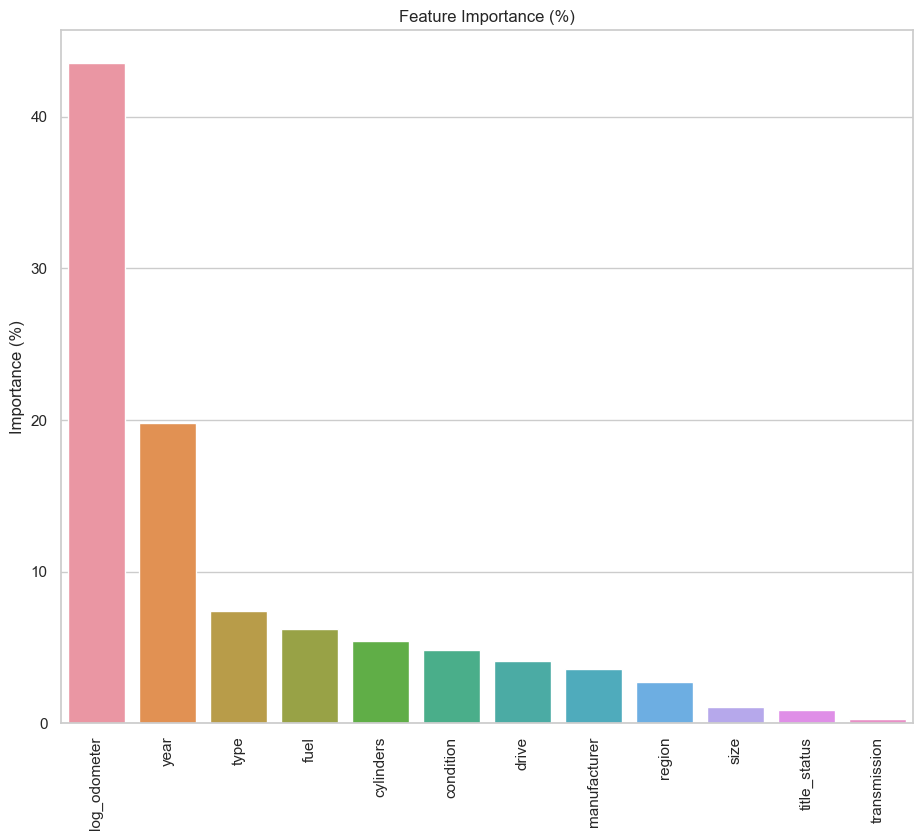

In [33]:
# Train the model
Ridge_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(Ridge_model, X_test, y_test, n_repeats=10, random_state=42)

# Normalize to get percentages
total_importance = perm_importance.importances_mean.sum()
perm_importance_percent = (perm_importance.importances_mean / total_importance) * 100

# Display results as percentages
perm_importance_sorted_percent = pd.Series(perm_importance_percent, index=X_test.columns).sort_values(ascending=False)
print("Top 10 Features by Importance (in %):")
print(perm_importance_sorted_percent.head(10))

# Plot feature importance as percentages
plt.figure(figsize=(11, 9))
sns.barplot(x=perm_importance_sorted_percent.index, y=perm_importance_sorted_percent.values)
plt.title('Feature Importance (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.ylabel('Importance (%)')
plt.savefig('images/Ridge_Feature_Importance.jpg')
plt.show()

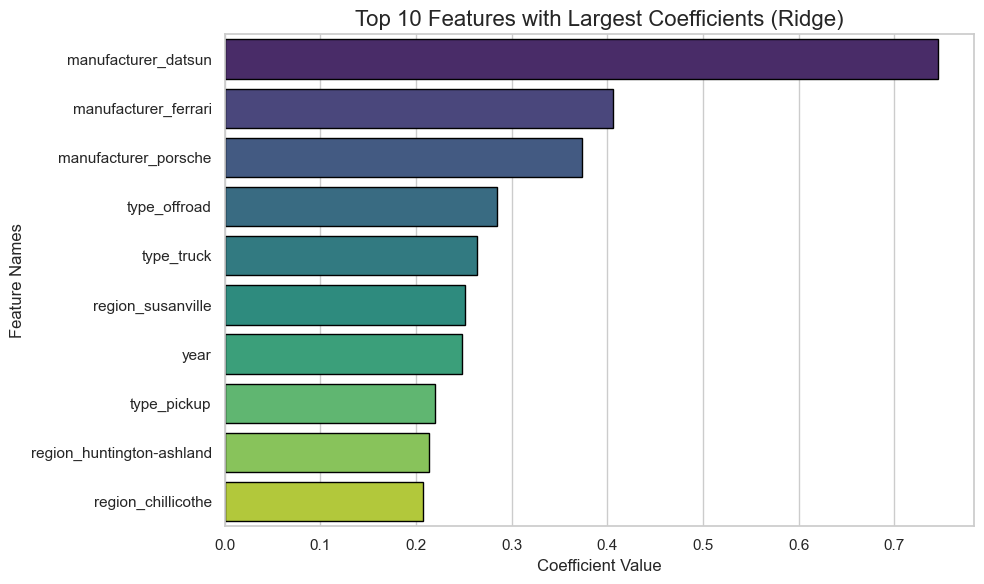

In [30]:
# Extract the best estimator from the grid search
ridge_model = grid_search_ridge.best_estimator_

# Get the feature names from the preprocessor pipeline
onehot_feature_names = ridge_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# extract the coefficients from the Ridge model
ridge_coefs = pd.Series(ridge_model.named_steps['model'].coef_, index=feature_names)

# Sort coefficients by absolute value for better visualization
ridge_coefs_sorted = ridge_coefs.sort_values(key=abs, ascending=False)

# Seaborn style
sns.set(style="whitegrid")

# Plot the top 10 positive and negative coefficients using seaborn
plt.figure(figsize=(10, 6))
top_10_coefs = ridge_coefs.sort_values(ascending=False).head(10)
sns.barplot(x=top_10_coefs.values, y=top_10_coefs.index, palette='viridis', edgecolor='black')
plt.title('Top 10 Features with Largest Coefficients (Ridge)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)
plt.tight_layout()
plt.savefig('images/ridge_top_10_coefs_seaborn.png')
plt.show()

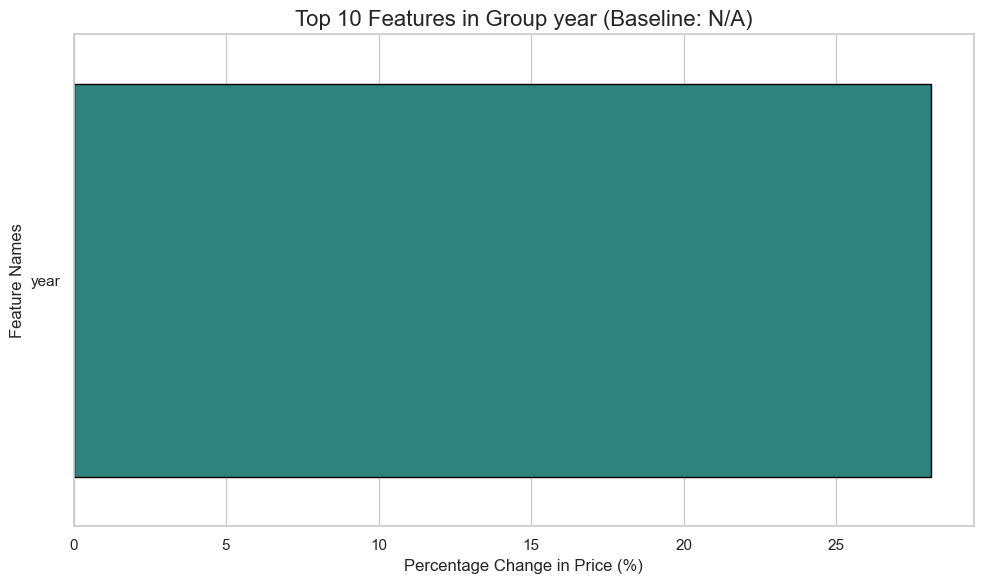

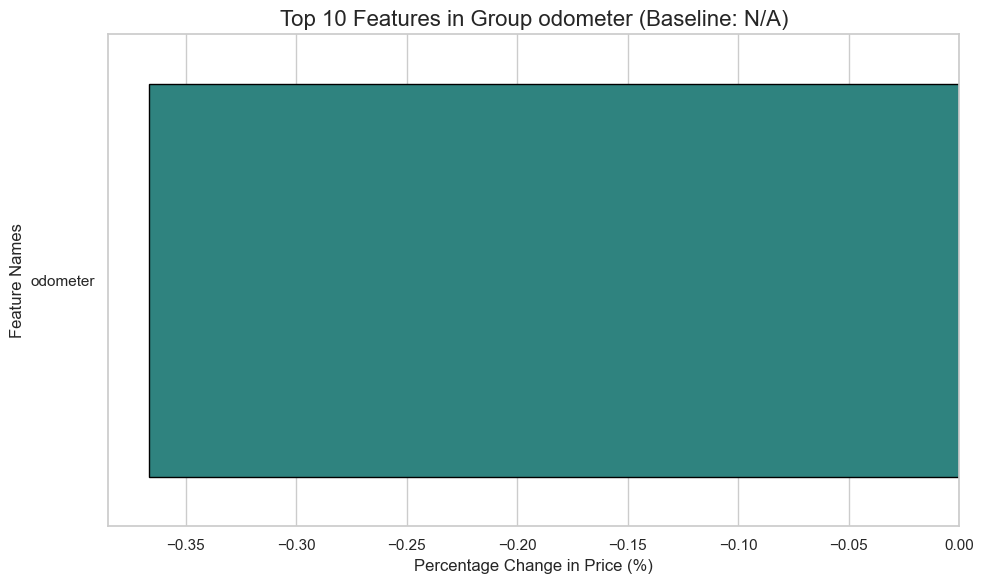

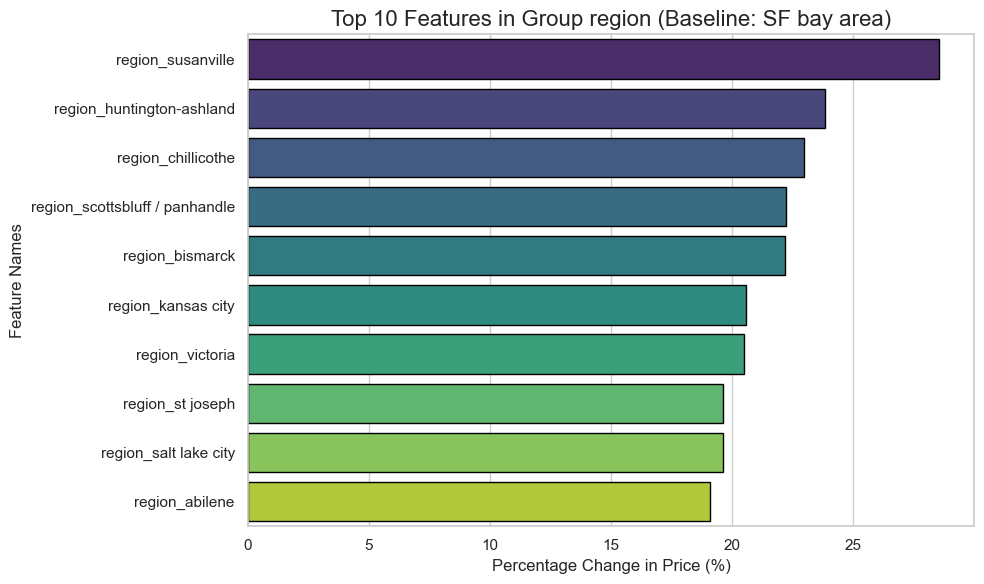

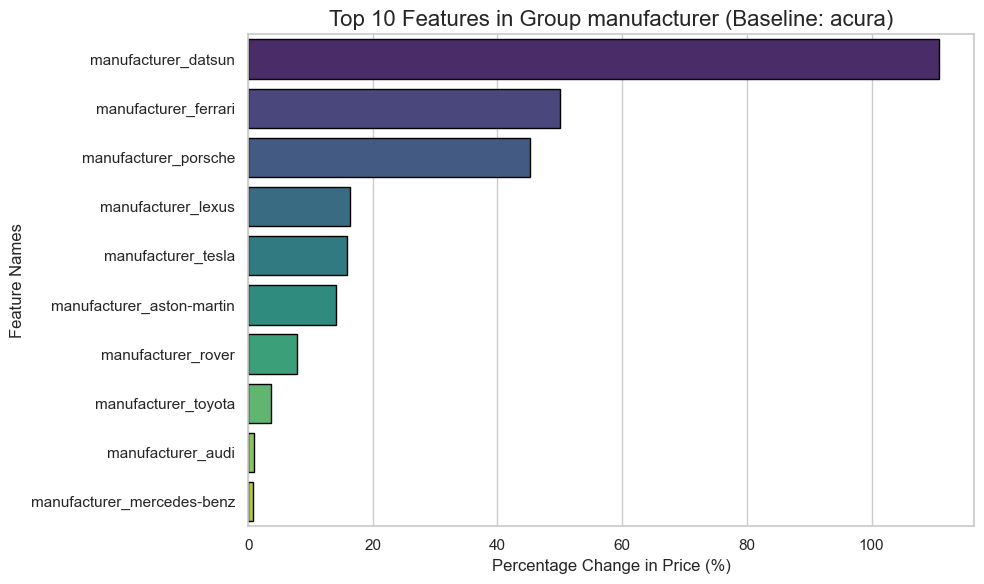

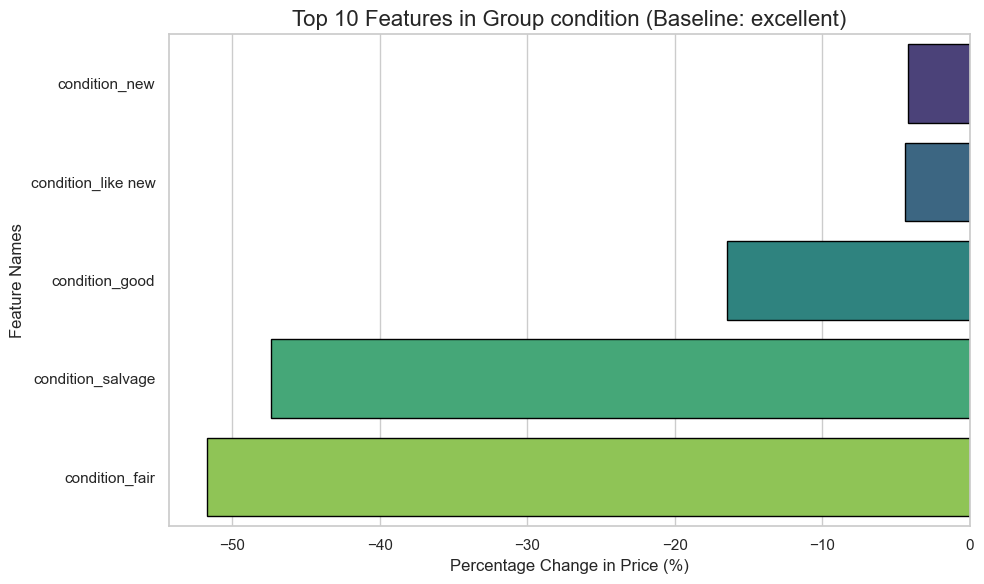

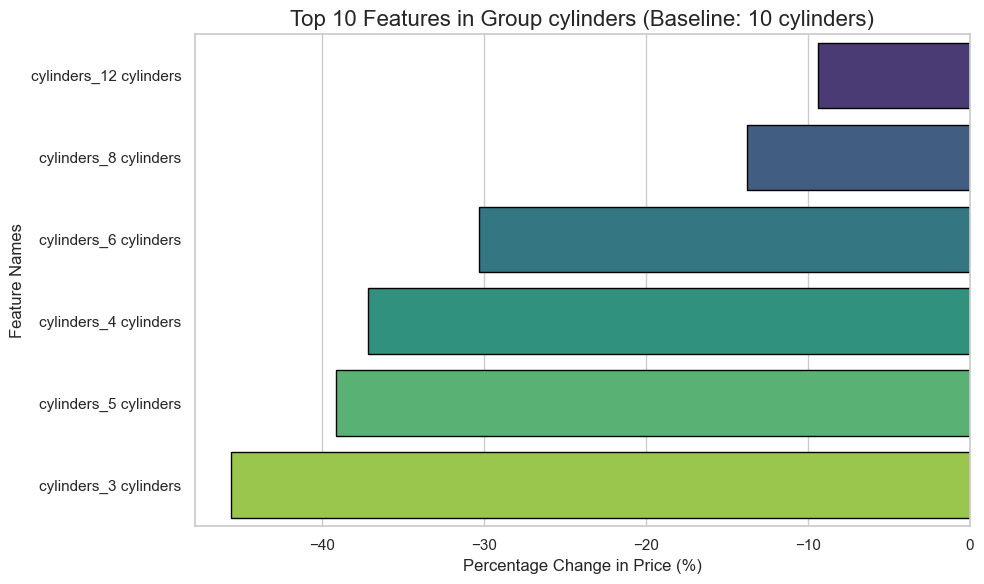

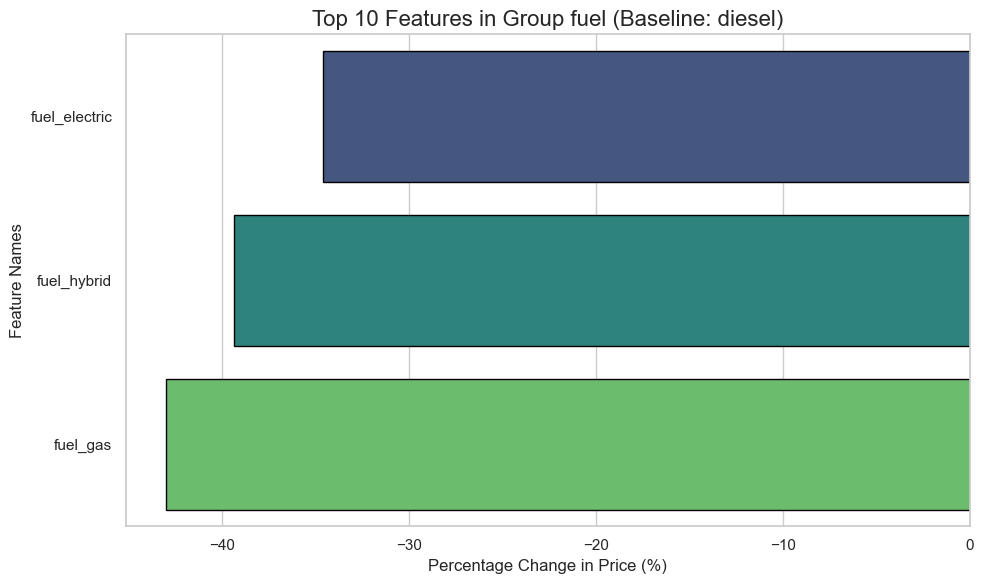

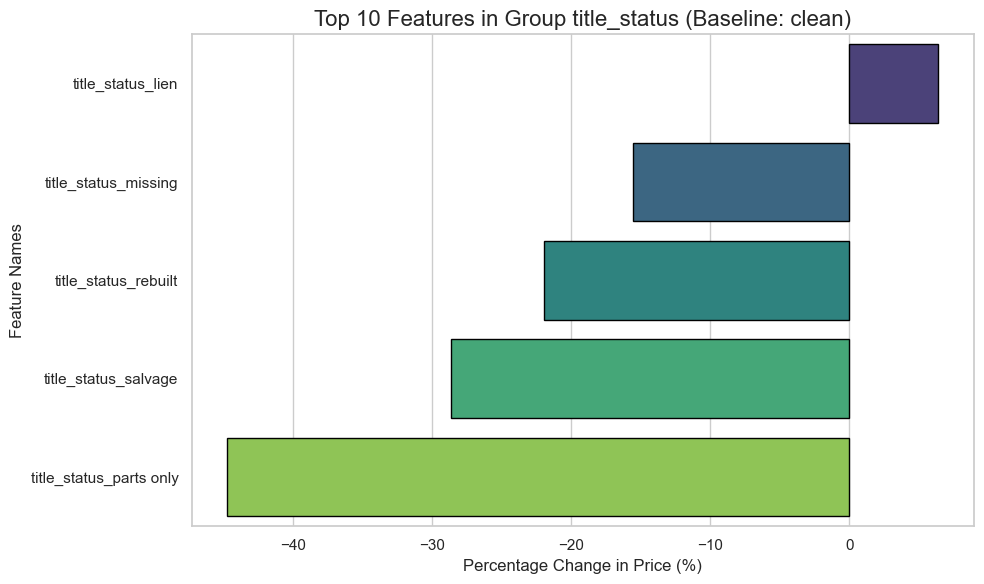

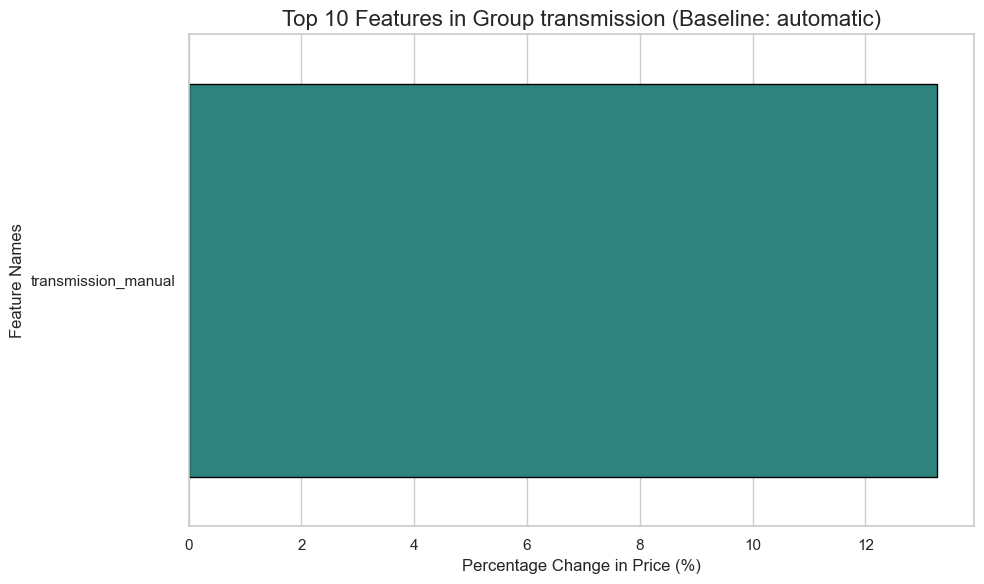

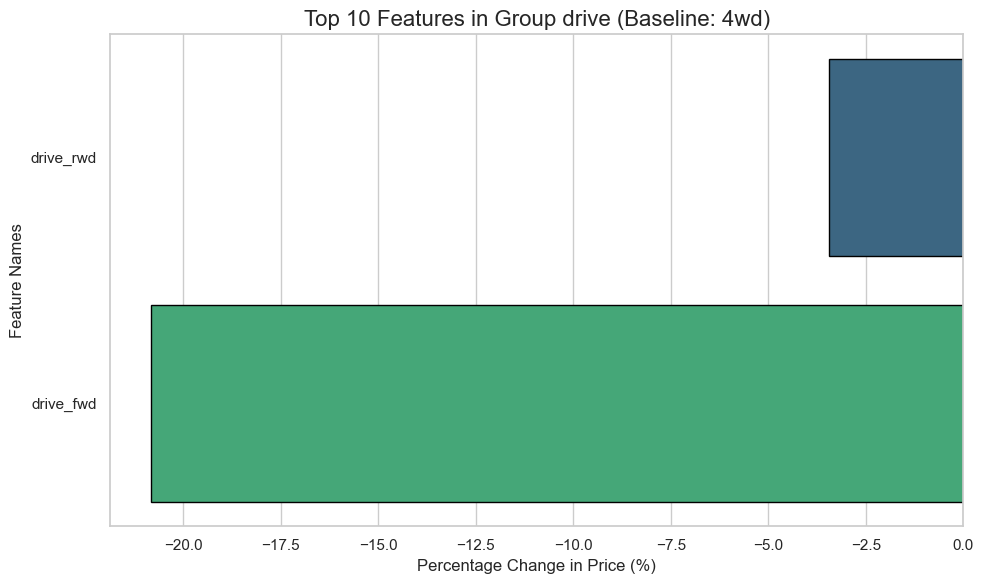

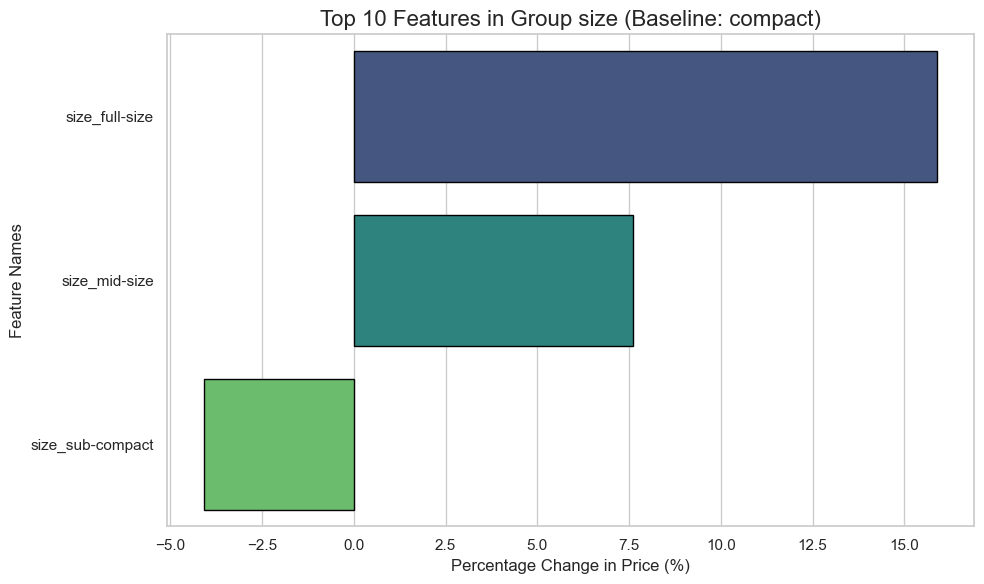

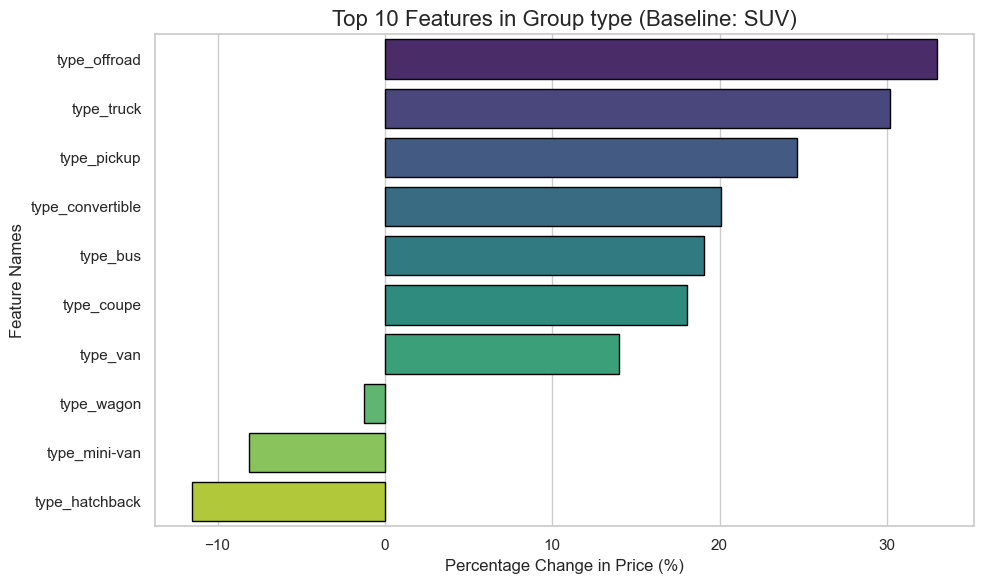

In [31]:
# Step 2: Get the feature names from the preprocessor pipeline
onehot_feature_names = ridge_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# Step 3: Extract the coefficients from the Ridge model
ridge_coefs = pd.Series(ridge_model.named_steps['model'].coef_, index=feature_names)

# Step 4: Convert coefficients to percentage change for log-transformed price
def convert_to_percentage(feature, coef):
    if feature in onehot_feature_names:  # Categorical features
        return (np.exp(coef) - 1) * 100  # Convert to percentage change
    elif feature == 'log_odometer':  # Handle log-transformed 'odometer'
        # This reflects the percentage change in price for percentage change in odometer
        return (np.exp(coef * 0.01) - 1) * 100  # For 1% change in odometer
    else:  # Non-log-transformed numerical features (e.g., year)
        return (np.exp(coef) - 1) * 100  # Convert to percentage change for log-transformed target (price)

# Apply the conversion to coefficients
converted_coefs = pd.Series([convert_to_percentage(feature, coef) for feature, coef in ridge_coefs.items()], index=feature_names)

# Step 5: Rename 'log_odometer' to 'odometer' after conversion
converted_coefs.index = converted_coefs.index.str.replace('log_odometer', 'odometer')

# Step 6: Create a DataFrame with feature names, original coefficients, and corresponding percentage changes
df_coefs = pd.DataFrame({
    'feature': converted_coefs.index,
    'original_coefficient': ridge_coefs.values,
    'percentage_change': converted_coefs.values
})

# Step 7: Extract the prefix (grouping category 'A') by splitting at the underscore
df_coefs['group'] = df_coefs['feature'].apply(lambda x: x.split('_')[0])
df_coefs['group'] = df_coefs['group'].replace('title', 'title_status')
df_coefs['baseline'] = df_coefs['group'].map(drop_values) 

# Step 8: Save this DataFrame to an Excel file
output_file = os.path.join('output', 'ridge_coefficients.xlsx')
df_coefs.to_excel(output_file, index=False)


# Step 9: Plot top 10 features for each group (prefix)
groups = df_coefs['group'].unique()

for group in groups:
    group_df = df_coefs[df_coefs['group'] == group].sort_values(by='percentage_change', ascending=False).head(10)
    
    # Create a bar plot for the top 10 features in the current group
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_df['percentage_change'], y=group_df['feature'], palette='viridis', edgecolor='black')
    
    # Add baseline information to the plot title
    baseline = drop_values.get(group, 'N/A')
    plt.title(f'Top 10 Features in Group {group} (Baseline: {baseline})', fontsize=16)
    plt.xlabel('Percentage Change in Price (%)', fontsize=12)
    plt.ylabel('Feature Names', fontsize=12)
    
    plt.tight_layout()
    
    # Save the plot in the output folder
    plt.savefig(f'images/ridge_top_10_{group}_changes.png')
    plt.show()

# Deployment - Analysis Report: Key Drivers of Used Car Prices

## Objective:
The goal of this analysis was to identify the main factors influencing the prices of used cars in the dataset. Through a Ridge Regression model and additional feature importance analysis, we have outlined the primary features that have a significant impact on price determination.

### 1. Methodology Summary
We applied the Ridge Regression model, which helps to determine the relative importance of different factors while controlling for overfitting. In addition, we used a permutation importance technique to validate and highlight the most influential features in predicting used car prices.

### 2. Key Findings
Top Features Influencing Used Car Prices:

The top features from our Ridge Regression model are summarized below. These features have the largest positive or negative impact on price, indicating that vehicles with these characteristics tend to have higher or lower prices, respectively.


As shown in the chart above, the following **factors have the greatest influence**:

**Manufacturer**: Certain manufacturers like Datsun, Ferrari, and Porsche have the highest positive impact on price, indicating that cars from these manufacturers command significantly higher prices.

**Vehicle Type**: Specific types such as offroad, truck, and pickup vehicles also have a considerable positive influence on price.

**Region: Regional factors**, including locations like Susanville and Huntington-Ashland, play a crucial role in determining the price.

**Year**: As expected, newer vehicles tend to be priced higher, reflected in the positive correlation of the year feature.

### 3. Feature Insights
**Vehicle Manufacturer**: The data shows that the manufacturer significantly affects the price of a vehicle. Notably, brands like Datsun and Ferrari exhibit the strongest correlation with higher prices.

**Vehicle Type**: Larger or more specialized vehicle types, such as trucks, pickups, and off-road vehicles, tend to be priced higher compared to regular sedans.

**Regional Impact**: Prices vary depending on the region, with certain areas exhibiting stronger demand or higher pricing for vehicles.

**Odometer**: As expected, higher odometer readings (representing more miles driven) are associated with lower prices, but the magnitude of this effect is less compared to other features.

### 4. Conclusion
This analysis has identified several key drivers of used car prices. By focusing on these factors—especially the manufacturer, vehicle type, and region—businesses can better understand market trends and make more informed pricing decisions. Additionally, regions where demand is higher or specific vehicle types that command premium prices can be targeted for better marketing and sales strategies.

### 5. Recommendations
**Target Marketing**: Focus advertising efforts on premium manufacturers such as Datsun, Ferrari, and Porsche.

**Inventory Strategy**: Consider stocking more vehicles that fall into higher-demand categories, such as off-road and truck types, in regions where prices tend to be higher.

**Dynamic Pricing**: Implement region-specific pricing strategies to take advantage of local market conditions.